# Graphene band structure

This example plots the band structure of graphene, a 2D material. 2D band
structures are not supported natively (yet), so we manually build a custom
path in reciprocal space.

n     Energy            log10(ΔE)   log10(Δρ)   Diag   Δtime
---   ---------------   ---------   ---------   ----   ------
  1   -11.15666432112                   -0.60    6.0    221ms
  2   -11.16021316763       -2.45       -1.30    1.0    122ms
  3   -11.16039927130       -3.73       -2.33    2.0    136ms
  4   -11.16041628978       -4.77       -3.20    2.4    152ms
  5   -11.16041704006       -6.12       -3.38    2.4    151ms
  6   -11.16041704725       -8.14       -3.53    1.0    113ms
  7   -11.16041704951       -8.65       -3.83    1.0    111ms
  8   -11.16041705065       -8.94       -4.17    1.1    114ms
  9   -11.16041705118       -9.28       -4.55    1.4    120ms
 10   -11.16041705137       -9.72       -4.95    1.1    123ms
 11   -11.16041705144      -10.17       -5.44    2.0    454ms
 12   -11.16041705145      -11.09       -5.86    1.9    124ms
 13   -11.16041705145      -11.74       -6.45    2.0    131ms


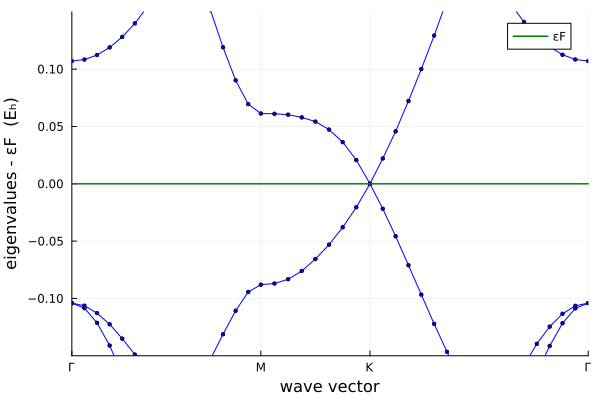

In [1]:
using DFTK
using Unitful
using UnitfulAtomic
using LinearAlgebra
using Plots

# Define the convergence parameters (these should be increased in production)
L = 20  # height of the simulation box
kgrid = [6, 6, 1]
Ecut = 15
temperature = 1e-3

# Define the geometry and pseudopotential
a = 4.66  # lattice constant
a1 = a*[1/2,-sqrt(3)/2, 0]
a2 = a*[1/2, sqrt(3)/2, 0]
a3 = L*[0  , 0        , 1]
lattice = [a1 a2 a3]
C1 = [1/3,-1/3,0.0]  # in reduced coordinates
C2 = -C1
positions = [C1, C2]
C = ElementPsp(:C, load_psp("hgh/pbe/c-q4"))
atoms = [C, C]

# Run SCF
model = model_DFT(lattice, atoms, positions; functionals=PBE(), temperature)
basis = PlaneWaveBasis(model; Ecut, kgrid)
scfres = self_consistent_field(basis)

# Construct 2D path through Brillouin zone
kpath = irrfbz_path(model; dim=2, space_group_number=13)  # graphene space group number
bands = compute_bands(scfres, kpath; kline_density=20)
plot_bandstructure(bands)